In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('L1_loss_MC.csv')
df.head()


,Name,Brier score 1 mm,Brier score 10 mm,Brier score 100 mm,Brier score 150 mm,Brier score 20 mm,Brier score 5 mm,Brier score 50 mm,ECE 1 mm,ECE 10 mm,...,test_ets_10.0,test_ets_20.0,test_ets_5.0,test_freqbias_1.0,test_freqbias_10.0,test_freqbias_20.0,test_freqbias_5.0,train_L1loss,val_loss,val_rmse
0,icy-sweep-9,0.129056,0.119695,0.006456,0.004128,0.071430,0.138321,0.013001,0.110461,0.127211,...,0.152466,0.066443,0.257015,3.865921,0.480754,0.375749,0.834172,0.003035,0.000017,2.013707
1,hearty-sweep-8,0.117913,0.122631,0.004647,0.001999,0.080168,0.120059,0.014774,0.069051,0.168040,...,0.124164,0.027620,0.253321,3.484590,0.362912,0.396347,0.583420,0.002786,0.000018,2.049235
2,fallen-sweep-7,0.142170,0.100744,0.001138,0.000000,0.042054,0.150604,0.012288,0.035632,0.086305,...,0.173451,0.099574,0.272763,3.897895,0.492905,0.584829,0.957600,0.003176,0.000015,1.850286
3,dry-sweep-6,0.115035,0.140968,0.000083,0.000000,0.066833,0.141720,0.011448,0.038561,0.168425,...,0.193945,0.084362,0.257978,3.915477,0.387312,0.321572,1.141402,0.002845,0.000015,1.889905
4,icy-sweep-5,0.139612,0.102030,0.007322,0.003202,0.046096,0.133868,0.020408,0.073589,0.088056,...,0.171835,0.067236,0.264400,2.720759,0.535189,0.196696,0.956520,0.002368,0.000016,1.909115


In [10]:

brier_scores = pd.DataFrame(columns=["mm", "brierScore"])
ECE = pd.DataFrame(columns=["mm", "ECE"])
KL = pd.DataFrame(columns=["mm", "KL"])
thresholds = [1,5,10,20,50,100,150]
for th in thresholds:
    for d in df[f"Brier score {th} mm"].to_list():
        brier_scores = pd.concat([brier_scores, pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
    for d in df[f"ECE {th} mm"].to_list():
        ECE = pd.concat([ECE, pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
    for d in df[f"KL {th} mm"].to_list():
        KL = pd.concat([KL, pd.DataFrame([[th, d]], columns=["mm", "KL"])], ignore_index=True)

/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_33610/625680837.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  brier_scores = pd.concat([brier_scores, pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_33610/625680837.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ECE = pd.concat([ECE, pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
/var/folders/30/xm8738cn5b3g6707w_6b0w740

[Text(0.5, 1.0, 'MC')]

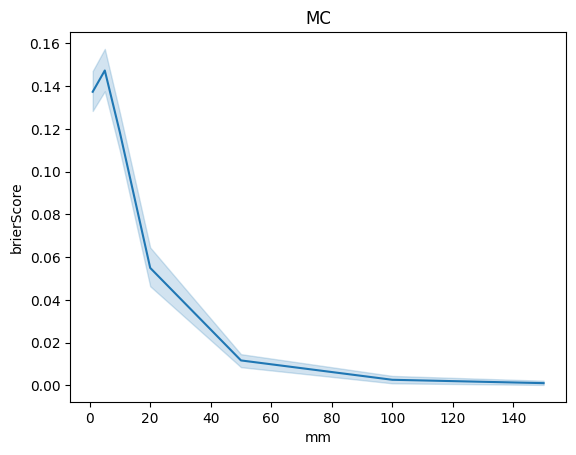

In [11]:

sns.lineplot(data=brier_scores, x="mm", y="brierScore").set(title='MC')



[Text(0.5, 1.0, 'MC')]

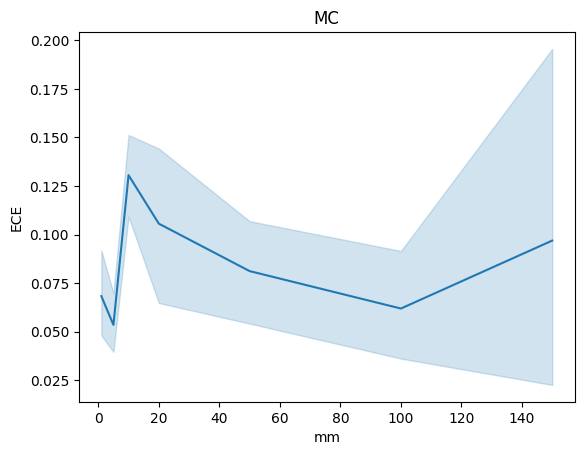

In [12]:
sns.lineplot(data=ECE, x="mm", y="ECE").set(title='MC')

[Text(0.5, 1.0, 'MC')]

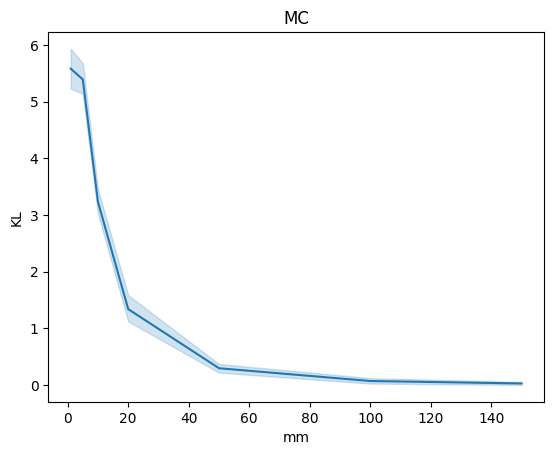

In [13]:
sns.lineplot(data=KL, x="mm", y="KL").set(title='MC')

In [14]:
rmse =df["test rmse"].to_numpy()
print(f"rmse mean: {np.mean(rmse):.4f},  var: {np.var(rmse):.4f}")

rmse mean: 5.0599,  var: 1.4885
